<a href="https://colab.research.google.com/github/JoshuaMur/utm_ml_weather_app/blob/main/utm_weather_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import time
import datetime as dt
from datetime import datetime


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams



In [ ]:
!unzip /content/drive/MyDrive/utm_project/utm_weather_project/weatherHistory.csv.zip

In [ ]:
data = pd.read_csv('weatherHistory.csv', parse_dates=['Formatted Date'])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
from pandas.core.arrays import categorical
categorical = data.select_dtypes(include = ['object']).keys()
quantitative  = data.select_dtypes(include = ['float']).keys()

print(f"Objects are : {categorical}")
print(f"Floates are : {quantitative}")

Objects are : Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')
Floates are : Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [ ]:
#date manipulation 
import datetime as dt

data['date'] = pd.to_datetime(data['Formatted Date'], utc=True)


In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00


In [ ]:

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,year,month,day,hour
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


In [ ]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),year,month,day,hour
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,2011.00029,6.523001,15.727100,11.499891
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.16216,3.448501,8.802216,6.922049
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.00000,1.000000,1.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2008.00000,4.000000,8.000000,6.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,2011.00000,7.000000,16.000000,11.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2014.00000,10.000000,23.000000,17.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,2016.00000,12.000000,31.000000,23.000000


In [ ]:
data = data.drop('Loud Cover', axis=1)

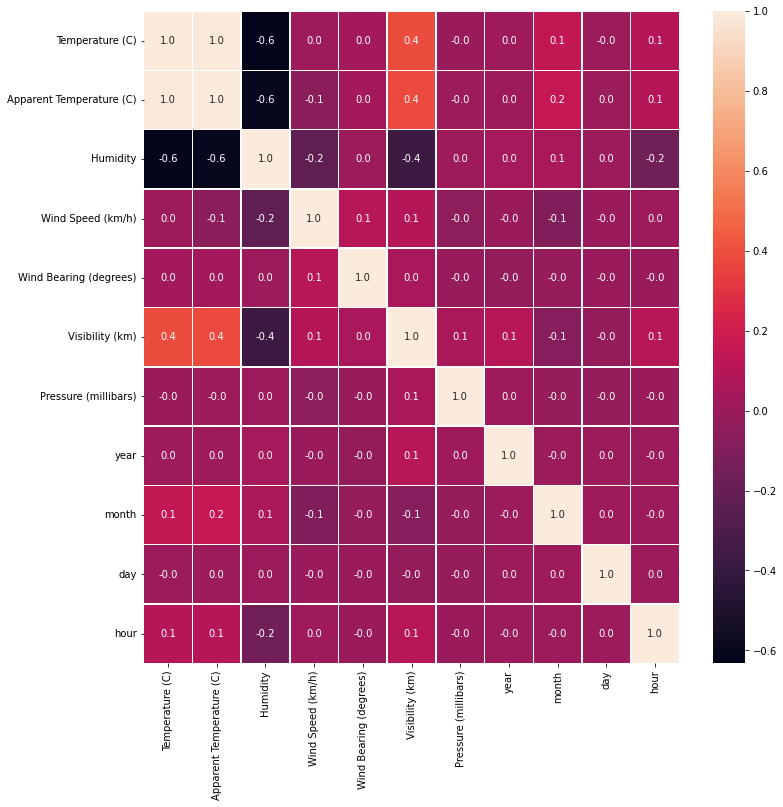

In [ ]:
#Correlation Vizualisation

f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(data.corr(), annot=True, linewidths= .5, fmt= '.1f', ax=ax)
plt.show()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4ba70b350>


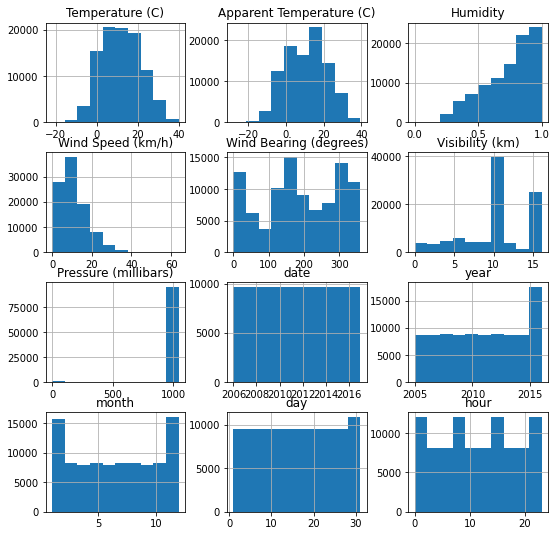

In [ ]:
rcParams['figure.figsize'] = 9, 9
print(data.hist())

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,date,year,month,day,hour
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


In [ ]:
len(data['Daily Summary'].unique()), len(data['Summary'].unique()), len(data['Precip Type'].unique())

(214, 27, 3)

In [ ]:
data['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [ ]:
#df['col'].replace(to_replace=['category_1', 'category_2', 'category_3'], value=[1, 2, 3], inplace=True)
data['Daily Summary'].replace(to_replace=data['Daily Summary'].unique(), value= [x for x in range(len(data['Daily Summary'].unique()))], inplace=True)

In [ ]:
data['Daily Summary'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,date,year,month,day,hour
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,10,2016-09-09 17:00:00+00:00,2016,9,9,17
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,10,2016-09-09 18:00:00+00:00,2016,9,9,18
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,10,2016-09-09 19:00:00+00:00,2016,9,9,19
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,10,2016-09-09 20:00:00+00:00,2016,9,9,20
96452,2016-09-09 23:00:00+02:00,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,1016.16,10,2016-09-09 21:00:00+00:00,2016,9,9,21


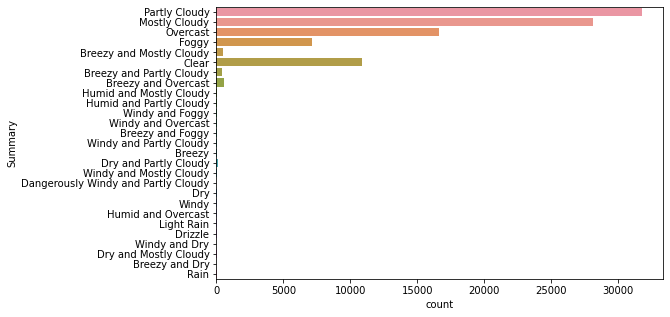

In [ ]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [ ]:
data['Daily Summary'].value_counts(dropna=False)

1      20085
0       9981
5       6169
10      5184
8       4201
       ...  
120       24
119       24
117       24
213       24
145       23
Name: Daily Summary, Length: 214, dtype: int64

In [ ]:
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [ ]:
data.fillna(method= 'ffill', inplace=True)

In [ ]:
data['Precip Type'].value_counts(dropna=False)

rain    85741
snow    10712
Name: Precip Type, dtype: int64

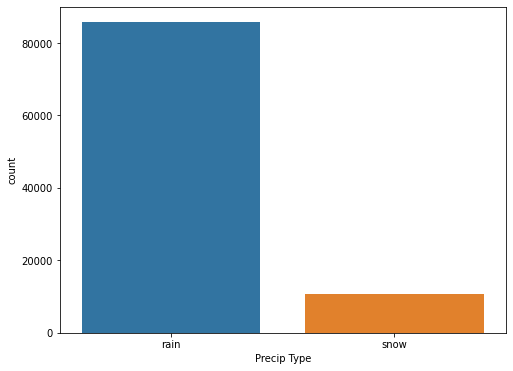

In [ ]:
rcParams['figure.figsize'] = 8, 6
sns.countplot(x=data['Precip Type'])

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,date,year,month,day,hour
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,2006-04-01 02:00:00+00:00,2006,4,1,2


In [ ]:
len(data['Summary'].unique())

27

In [ ]:
#df['col'].replace(to_replace=['category_1', 'category_2', 'category_3'], value=[1, 2, 3], inplace=True)
data['Summary'].replace(to_replace=data['Summary'].unique(), value=[x for x in range(1, len(data['Summary'].unique())+1)], inplace=True)

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,date,year,month,day,hour
0,2006-04-01 00:00:00+02:00,1,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00+02:00,1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00+02:00,2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00+02:00,1,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00+02:00,2,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,2006-04-01 02:00:00+00:00,2006,4,1,2


In [ ]:
#df['col'].replace(to_replace=['category_1', 'category_2', 'category_3'], value=[1, 2, 3], inplace=True)
data['Precip Type'].replace(to_replace=data['Precip Type'].unique(), value=[1, 2], inplace=True)

In [ ]:
data['Precip Type'].unique()

array([1, 2])

In [ ]:
data.dtypes

Formatted Date                           object
Summary                                   int64
Precip Type                               int64
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                             int64
date                        datetime64[ns, UTC]
year                                      int64
month                                     int64
day                                       int64
hour                                      int64
dtype: object

In [ ]:
data = data.drop('Formatted Date', axis=1)

In [ ]:
data.dtypes

Summary                                   int64
Precip Type                               int64
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                             int64
date                        datetime64[ns, UTC]
year                                      int64
month                                     int64
day                                       int64
hour                                      int64
dtype: object

In [ ]:
data.drop('date', axis=1, inplace=True)

In [ ]:
data.dtypes

Summary                       int64
Precip Type                   int64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                 int64
year                          int64
month                         int64
day                           int64
hour                          int64
dtype: object

In [ ]:
#Converting Wind Speed to From Km/h to Knots (1 knot = 1.85200 km/h)
data['WindSpeed'] = data['Wind Speed (km/h)']*1.852

In [ ]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day,hour,WindSpeed
0,1,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,2006,3,31,22,26.149684
1,1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,2006,3,31,23,26.418039
2,2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,2006,4,1,0,7.275397
3,1,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,2006,4,1,1,26.119867
4,2,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,2006,4,1,2,20.454599


In [ ]:
#Converting Wind Speed to From Km/h to Knots (1 km/h = 0.53996 knots)
data['WindSpeed (knots'] = data['Wind Speed (km/h)']*0.53996


In [ ]:
data = data.drop(['Wind Speed (km/h)', 'WindSpeed'], axis=1)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day,hour,WindSpeed (knots
0,1,1,9.472222,7.388889,0.89,251.0,15.8263,1015.13,0,2006,3,31,22,7.624073
1,1,1,9.355556,7.227778,0.86,259.0,15.8263,1015.63,0,2006,3,31,23,7.702313
2,2,1,9.377778,9.377778,0.89,204.0,14.9569,1015.94,0,2006,4,1,0,2.121179
3,1,1,8.288889,5.944444,0.83,269.0,15.8263,1016.41,0,2006,4,1,1,7.615380
4,2,1,8.755556,6.977778,0.83,259.0,15.8263,1016.51,0,2006,4,1,2,5.963642


In [ ]:
data.dtypes, data.shape

(Summary                       int64
 Precip Type                   int64
 Temperature (C)             float64
 Apparent Temperature (C)    float64
 Humidity                    float64
 Wind Bearing (degrees)      float64
 Visibility (km)             float64
 Pressure (millibars)        float64
 Daily Summary                 int64
 year                          int64
 month                         int64
 day                           int64
 hour                          int64
 WindSpeed (knots            float64
 dtype: object, (96453, 14))

###The Machine Learning Phase:
Model Architecture and Model Training

In [ ]:
#Importing ML Libraries

